In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from sklearn import metrics

In [6]:
data=pd.read_csv("data.csv")
data.head()

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,Result
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


# Summarize Data
a) Descriptive Statistics b) Data Visualizations

In [7]:
data.describe()

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [8]:
corr=data.corr()
print(corr)

           1         2         3         4         5         6         7  \
1   1.000000  0.735896  0.571537  0.491438  0.344797  0.238921  0.260815   
2   0.735896  1.000000  0.779916  0.606684  0.419669  0.332329  0.279040   
3   0.571537  0.779916  1.000000  0.781786  0.546141  0.346275  0.190434   
4   0.491438  0.606684  0.781786  1.000000  0.726943  0.352805  0.246440   
5   0.344797  0.419669  0.546141  0.726943  1.000000  0.597053  0.335422   
6   0.238921  0.332329  0.346275  0.352805  0.597053  1.000000  0.702889   
7   0.260815  0.279040  0.190434  0.246440  0.335422  0.702889  1.000000   
8   0.355523  0.334615  0.237884  0.246742  0.204006  0.471683  0.675774   
9   0.353420  0.316733  0.252691  0.247078  0.177906  0.327578  0.470580   
10  0.318276  0.270782  0.219637  0.237769  0.183219  0.288621  0.425448   
11  0.344058  0.297065  0.274610  0.271881  0.231684  0.333570  0.396588   
12  0.210861  0.194102  0.214807  0.175381  0.211657  0.344451  0.274432   
13  0.210722

<AxesSubplot:>

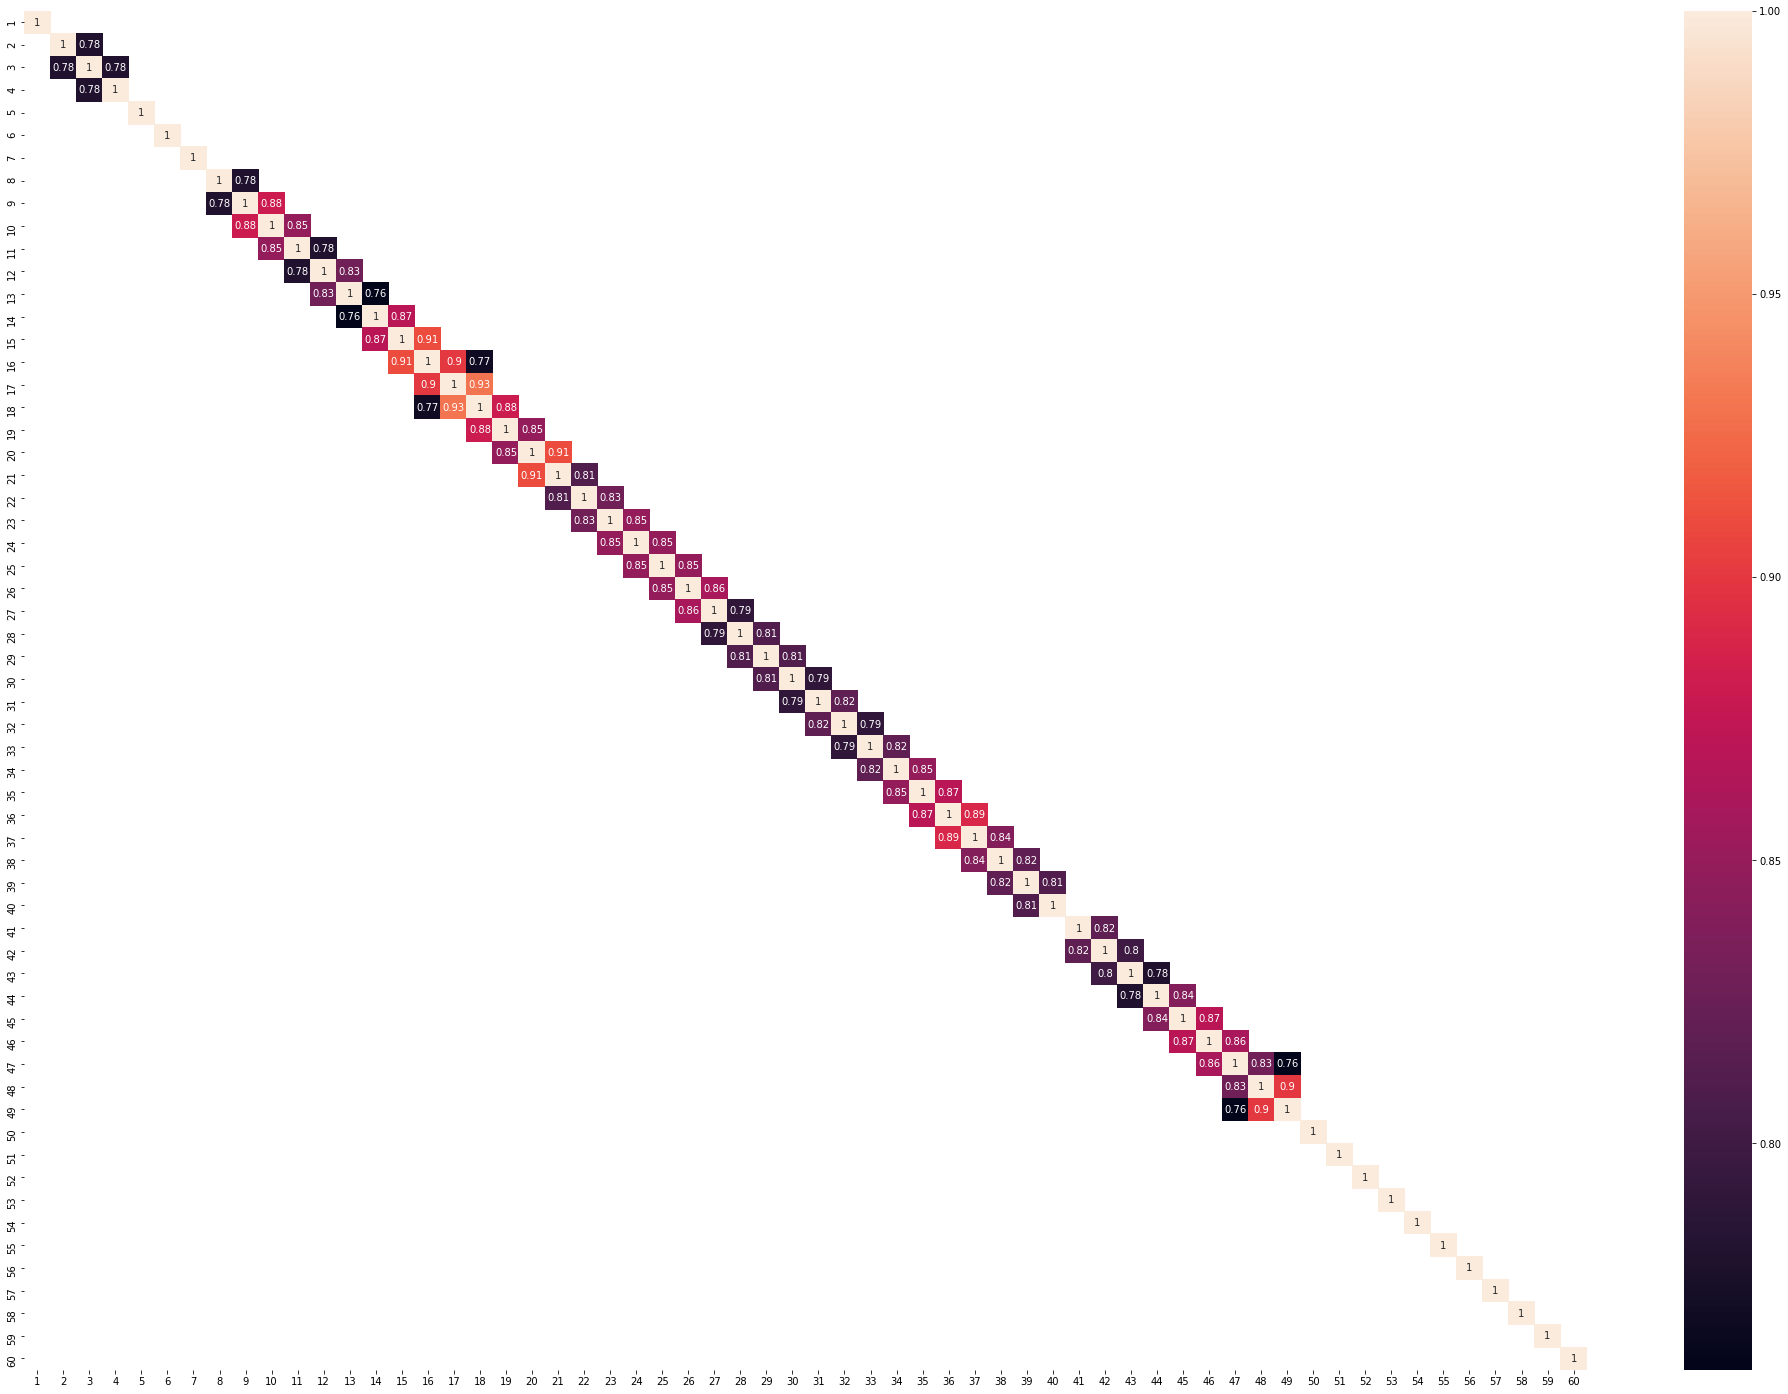

In [9]:
plt.subplots(figsize=(35,25))
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix[(correlation_matrix>0.75) | (correlation_matrix<-0.75)], annot=True)

<ipython-input-11-015d41f73a33>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(number_of_rows + 1,number_of_columns,i+1)
c:\users\aslaf\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-11-015d41f73a33>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(number_of_rows + 1,number_of_columns,i+1)
c:\users\aslaf\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: Fut

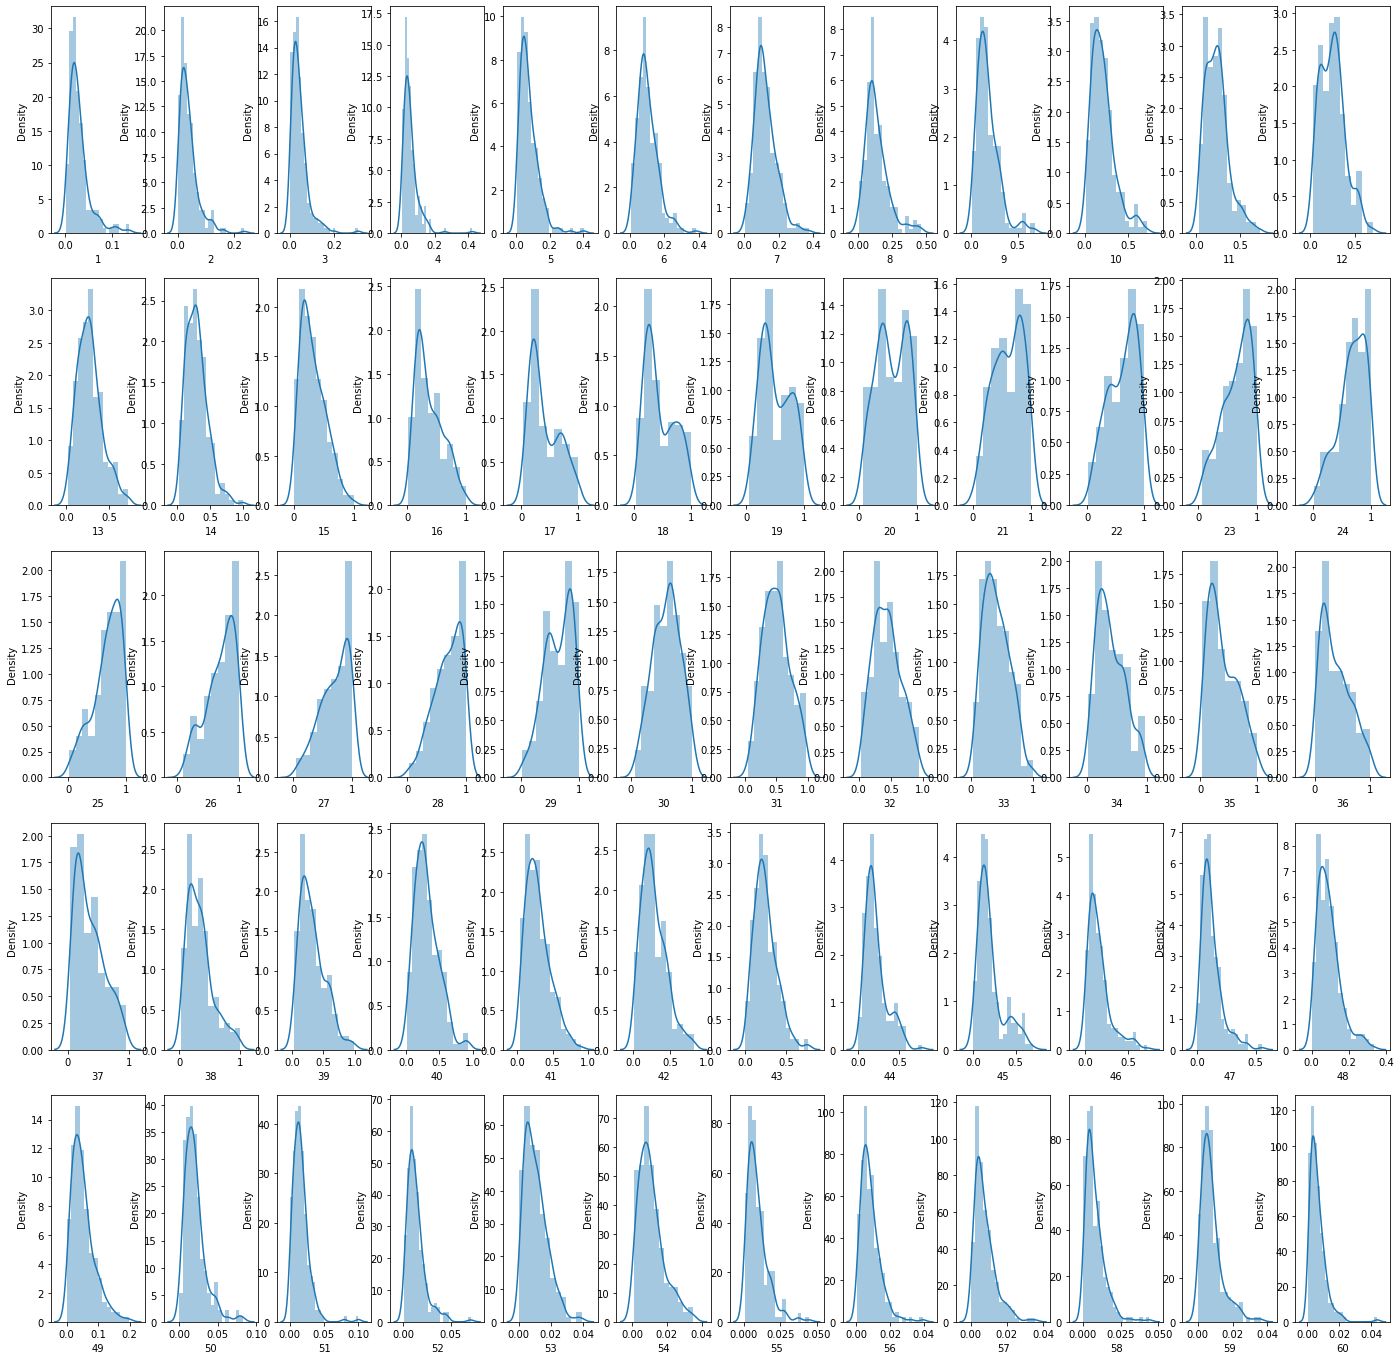

In [11]:
l = data.iloc[:,:-1].columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(data[l[i]],kde=True)


# Prepare Data
a) Data Cleaning b) Feature Selection c) Data Transforms 

In [12]:
# removing features which are highly correlated
#Selecting upper triangular matrix from the correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
#Finding columns with high correlation with each other
columns_to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
print('Columns with High Correlation:', columns_to_drop)

Columns with High Correlation: ['10', '11', '13', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '29', '30', '32', '34', '35', '36', '37', '38', '39', '40', '42', '45', '46', '47', '48', '49']


In [13]:
data.drop(columns_to_drop, inplace=True,axis = 1)

In [14]:
#label encoding the last target column
mapping_dict = {"Result": {"R": 1,"M": 0}}
data = data.replace(mapping_dict)

In [15]:
data.head()

,1,2,3,4,5,6,7,8,9,12,...,52,53,54,55,56,57,58,59,60,Result
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.1582,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.6552,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.7060,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1992,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.3952,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [16]:
data.shape

(208, 29)

In [17]:
data.isnull().sum()

1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
12        0
14        0
28        0
31        0
33        0
41        0
43        0
44        0
50        0
51        0
52        0
53        0
54        0
55        0
56        0
57        0
58        0
59        0
60        0
Result    0
dtype: int64

In [18]:
#outliers detection
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
print(z)

[[0.39955135 0.04064823 0.02692565 ... 0.17167808 0.65894689 1.06973356]
 [0.70353822 0.42163039 1.05561832 ... 0.44455424 0.41985233 1.06973356]
 [0.12922901 0.60106749 1.72340448 ... 0.25276128 0.25758223 1.06973356]
 ...
 [1.00438083 0.16007801 0.67384349 ... 0.03913824 0.67887143 0.93481221]
 [0.04953255 0.09539176 0.13480381 ... 0.70402047 0.34015415 0.93481221]
 [0.13794908 0.06497869 0.78861924 ... 0.29860448 0.99479044 0.93481221]]


In [19]:
threshold = 3
print(np.where(z > 3))

(array([  2,   2,   2,   5,  19,  19,  20,  22,  22,  33,  44,  44,  65,
        85,  85,  87,  91,  91,  97,  97,  98,  98,  98,  98,  98,  98,
       101, 105, 111, 111, 111, 112, 127, 127, 127, 129, 129, 131, 132,
       132, 133, 133, 134, 134, 134, 134, 135, 135, 135, 135, 136, 136,
       136, 136, 138, 138, 140, 140, 141, 142, 142, 142, 143, 144, 145,
       145, 146, 146, 146, 146, 147, 147, 147, 147, 147, 147, 147],
      dtype=int32), array([ 8,  9, 24, 10,  4,  7,  5, 14, 17, 17, 15, 16, 26,  1,  2, 24,  5,
        6, 26, 27,  0,  1,  2,  3,  4, 27, 25, 23,  2,  3,  4, 25, 10, 22,
       25,  0, 21,  0,  7,  8,  8, 20,  0,  6,  7,  8,  7,  8, 21, 23,  0,
        7,  8, 19,  2, 19, 17, 18, 27, 21, 22, 26, 19, 19,  1, 17,  0, 15,
       18, 19,  4, 17, 20, 22, 23, 24, 25], dtype=int32))


In [20]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
Q1

1         0.022200
2         0.031500
3         0.039000
4         0.040125
5         0.062225
6         0.067100
7         0.073100
8         0.089175
9         0.136400
12        0.197775
14        0.211000
28        0.365500
31        0.296400
33        0.298250
41        0.224425
43        0.169325
44        0.144875
50        0.013725
51        0.012400
52        0.009450
53        0.009825
54        0.009125
55        0.007950
56        0.006175
57        0.006725
58        0.006750
59        0.006650
60        0.005425
Result    1.000000
dtype: float64


1         0.013350
2         0.016450
3         0.018950
4         0.024375
5         0.038050
6         0.067025
7         0.080900
8         0.080425
9         0.097025
12        0.133475
14        0.175175
28        0.534775
31        0.345550
33        0.257875
41        0.163100
43        0.155200
44        0.126875
50        0.011550
51        0.008425
52        0.007275
53        0.005075
54        0.005375
55        0.004150
56        0.004400
57        0.003700
58        0.003600
59        0.003675
60        0.003100
Result    0.000000
Name: 0.25, dtype: float64

In [21]:
print(data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))

         1      2      3      4      5      6      7      8      9     12  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
203  False  False  False  False  False  False  False  False  False  False   
204  False  False  False  False  False  False  False  False  False  False   
205  False  False  False  False  False  False  False  False  False  False   
206  False  False  False  False  False  False  False  False  False  False   
207  False  False  False  False  False  False  False  False  False  False   

     ...     52     53     54     55     56     57     58     59     60  \


TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [22]:
data_outlier = data[(z < 3).all(axis=1)]

In [23]:
data_outlier.shape

(174, 29)

In [24]:
data_outlier.head()

,1,2,3,4,5,6,7,8,9,12,...,52,53,54,55,56,57,58,59,60,Result
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.1582,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.6552,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1992,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.3952,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.0658,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,1


In [25]:
dataset=data_outlier

In [26]:
X=dataset.iloc[:,:-1]
Y=dataset.iloc[:,-1]

In [27]:
#Scale the data
scaler = StandardScaler().fit(X)
names = X.columns
scaled_X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X, columns=names)
scaled_X.describe()
scaled_X.head()

,1,2,3,4,5,6,7,8,9,12,...,51,52,53,54,55,56,57,58,59,60
0,-0.269346,0.293262,0.264407,-0.843334,0.709884,0.053719,0.902862,0.712050,1.741020,-0.648533,...,1.072860,-1.290355,-0.508705,1.033559,-0.145038,2.266884,2.460836,0.448346,0.525226,-0.684127
1,1.503820,0.993152,1.862266,0.919508,1.267311,3.237879,2.193827,3.823076,2.002809,2.983818,...,-0.184506,-0.465599,-0.111556,-0.808648,0.261111,2.838775,1.581063,-0.340339,-0.307978,-0.351153
2,-0.970203,-0.627647,1.015208,-0.850649,-1.113314,-1.178473,-0.019853,0.174239,-1.142108,-0.348883,...,1.178620,0.069769,-0.988595,0.884191,0.094959,0.026979,-0.398426,-0.453008,-0.571095,1.674437
3,3.669466,1.651601,0.468471,-0.159410,-0.176156,-0.618204,0.212395,2.145107,2.263450,1.083594,...,0.179778,-1.232477,-0.690732,0.137350,0.556493,-1.355091,0.085449,-0.362873,0.897974,1.036237
4,0.550656,2.986918,3.702692,3.549143,2.462492,1.497258,-0.787736,0.381089,0.562967,-1.323844,...,0.638070,1.227322,2.519561,0.568858,-0.181961,1.575850,0.525336,1.777842,-0.658800,1.285968
